# Visualizations of Data

In [3]:
#Necessary Importations
import pandas as pd
import numpy as np
import requests
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

# Necessary Lists & Functions

In [38]:
asean_list = ['VNM','LAO','THA','KHM','MYS','SGP','MMR','PHL','BRN','IDN']
south_asia_list = ['BGD','IND','PAK','NPL','LKA','BTN']
all_countries_list = ['VNM','LAO','THA','KHM','MYS','SGP','MMR','PHL','BRN','IDN','BGD','IND','PAK','NPL','LKA','BTN']

# Data Cleaning
def cleanUp(data):
    data = data[data['code'].isin(all_countries_list)]
    data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year
    data = data.drop(data[data['year'] <= 2010].index)
    data = data.set_index(['code','year'])
    return data

def merge(data1, data2):
    data_merged = pd.merge(
        data1,
        data2,
        right_index=True,
        left_index=True,
        how='inner'
    )
    return data_merged

def addRegions(data):
    data['region'] = np.where(data.index.get_level_values(0).isin(asean_list), 'ASEAN', 
                        np.where(data.index.get_level_values(0).isin(south_asia_list), 'SA', 'Other'))
    return data

#Visualizations
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x_col], df[y_col], label='Data')

    try:
        z = np.polyfit(df[x_col], df[y_col], 1)
        p = np.poly1d(z)
        xp = np.linspace(df[x_col].min(), df[x_col].max(), 100)
        plt.plot(xp, p(xp), "r--", label='Line of Best Fit')
    except np.linalg.LinAlgError:
        print("Error: unable to calculate line of best fit")

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatter Plot of {x_col} vs {y_col}')
    plt.legend()
    plt.show()

# Regressions
def ols(df, y_data, y_feat, x_data, x_feat):
    y_col = f"{y_data}_{y_feat}" if y_feat else y_data
    x_col = f"{x_data}_{x_feat}" if x_feat else x_data

    data = df[[x_col, y_col]].dropna()

    y = data[y_col]
    X = data[x_col]
    X = sm.add_constant(X)  # Add a constant (intercept) to the independent variable

    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())


# Reading in Data

In [5]:
df_access = pd.read_csv("../data/processed/access_merged.csv")
df_controls = pd.read_csv("../data/processed/control_var.csv")
df_agriculture = pd.read_csv("../data/processed/control_var.csv")
df_staple = pd.read_csv("../data/processed/StapleFoodStability_adjusted.csv")

# Merging Necessary Datasets

In [6]:
df_staple.head()

,code,year,Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer,Food supply quantity (kg/capita/yr)_Starchy Roots,rolling_std
0,AFG,2010,202.73,6.69,NaN
1,AFG,2011,197.29,5.72,NaN
2,AFG,2012,190.31,6.40,NaN
3,AFG,2013,193.09,14.55,NaN
4,AFG,2014,190.09,13.46,5.345682


In [7]:
df_staple.year.dtype

dtype('int64')

In [8]:
df_staple_clean = cleanUp(df_staple)

C:\Users\user\AppData\Local\Temp\ipykernel_18520\3297684762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['year'], format='%Y').dt.year


In [9]:
df_staple_clean.head()

Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer  \
code year                                                                 
BGD  2011                                             278.27              
     2012                                             278.22              
     2013                                             273.69              
     2014                                             272.78              
     2015                                             278.61              

           Food supply quantity (kg/capita/yr)_Starchy Roots  rolling_std  
code year                                                                  
BGD  2011                                              47.40    46.219922  
     2012                                              48.06    45.756559  
     2013                                              48.70    36.231714  
     2014                                              49.29     2.619036  
     2015                                              50.07     2.833060

In [10]:
print(df_staple_clean.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 160 entries, ('BGD', 2011) to ('VNM', 2022)
Data columns (total 3 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer  160 non-null    float64
 1   Food supply quantity (kg/capita/yr)_Starchy Roots             160 non-null    float64
 2   rolling_std                                                   160 non-null    float64
dtypes: float64(3)
memory usage: 5.1+ KB
None


In [11]:
df_access.head()

,country,year,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people)
0,BGD,2024-01-01,NaN,NaN,NaN
1,BGD,2023-01-01,99.6,NaN,7.51447
2,BGD,2022-01-01,99.2,105.264249,7.17020
3,BGD,2021-01-01,98.5,108.909443,6.64247
4,BGD,2020-01-01,95.2,105.291163,6.04506


In [12]:
df_access = df_access.rename({'country':"code"},axis=1)
df_access.head()

,code,year,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people)
0,BGD,2024-01-01,NaN,NaN,NaN
1,BGD,2023-01-01,99.6,NaN,7.51447
2,BGD,2022-01-01,99.2,105.264249,7.17020
3,BGD,2021-01-01,98.5,108.909443,6.64247
4,BGD,2020-01-01,95.2,105.291163,6.04506


In [13]:
df_access.year.dtype

dtype('O')

In [14]:
df_access['year'] = pd.to_datetime(df_access['year']).dt.year

In [15]:
df_access.head()

,code,year,Rural Access to Electricity(Percent of Population),Mobile Cellular Subscriptions (per 100 people),Fixed Broadband Subsciptions (per 100 people)
0,BGD,2024,NaN,NaN,NaN
1,BGD,2023,99.6,NaN,7.51447
2,BGD,2022,99.2,105.264249,7.17020
3,BGD,2021,98.5,108.909443,6.64247
4,BGD,2020,95.2,105.291163,6.04506


In [16]:
df_access_clean = cleanUp(df_access)

In [17]:
df_access_clean.head()

Rural Access to Electricity(Percent of Population)  \
code year                                                       
BGD  2024                                                NaN    
     2023                                               99.6    
     2022                                               99.2    
     2021                                               98.5    
     2020                                               95.2    

           Mobile Cellular Subscriptions (per 100 people)  \
code year                                                   
BGD  2024                                             NaN   
     2023                                             NaN   
     2022                                      105.264249   
     2021                                      108.909443   
     2020                                      105.291163   

           Fixed Broadband Subsciptions (per 100 people)  
code year                                                 
BGD  2024                                            NaN  
     2023                                        7.51447  
     2022                                        7.17020  
     2021                                        6.64247  
     2020                                        6.04506

In [18]:
df_2merged = merge(df_staple_clean,df_access_clean)
df_2merged = addRegions(df_2merged)

In [19]:
df_2merged.head(20)

Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer  \
code year                                                                 
BGD  2011                                             278.27              
     2012                                             278.22              
     2013                                             273.69              
     2014                                             272.78              
     2015                                             278.61              
     2016                                             267.70              
     2017                                             274.36              
     2018                                             283.25              
     2019                                             273.79              
     2020                                             278.99              
     2021                                             259.59              
     2022                                             263.10              
BTN  2019                                             268.44              
     2020                                             271.90              
     2021                                             274.47              
     2022                                             273.20              
KHM  2011                                             238.47              
     2012                                             242.43              
     2013                                             242.64              
     2014                                             240.28              

           Food supply quantity (kg/capita/yr)_Starchy Roots  rolling_std  \
code year                                                                   
BGD  2011                                              47.40    46.219922   
     2012                                              48.06    45.756559   
     2013                                              48.70    36.231714   
     2014                                              49.29     2.619036   
     2015                                              50.07     2.833060   
     2016                                              50.90     4.475908   
     2017                                              51.55     3.905774   
     2018                                              52.36     5.897978   
     2019                                              51.24     5.804944   
     2020                                              49.24     5.857403   
     2021                                              52.33     8.920262   
     2022                                              53.20    10.142942   
BTN  2019                                              52.80     7.845035   
     2020                                              56.15     7.584618   
     2021                                              50.92     6.139068   
     2022                                              50.03     4.572419   
KHM  2011                                             180.00    17.992801   
     2012                                             166.09    17.991163   
     2013                                             159.77    14.280668   
     2014                                             231.17     1.840878   

           Rural Access to Electricity(Percent of Population)  \
code year                                                       
BGD  2011                                               45.7    
     2012                                               53.8    
     2013                                               48.6    
     2014                                               48.1    
     2015                                               63.8    
     2016                                               66.1    
     2017                                               81.6    
     2018                                               81.3    
     2019      

# Descriptive Statistics and Visualizations

Text(0.5, 1.0, 'Rural Electricity Access over Time in Sample')

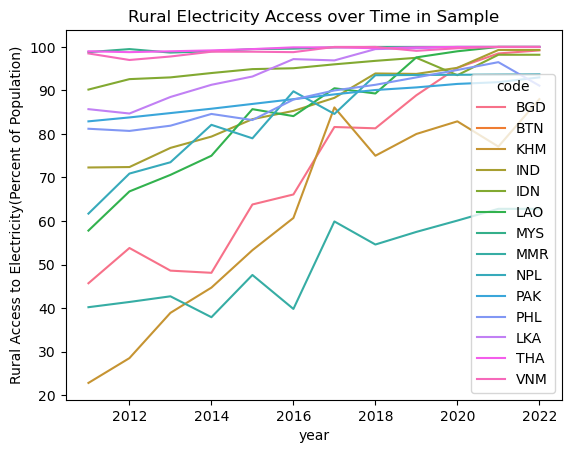

In [20]:
sns.lineplot(
    data = df_2merged,      # Dataframe with long format data
    x = 'year',                   # Column for x-axis (dates)
    y = 'Rural Access to Electricity(Percent of Population)',         # Column for y-axis (GDP values)
    hue = 'code'               # Column for color differentiation (countries)
).set_title("Rural Electricity Access over Time in Sample")

Text(0.5, 1.0, 'Food Supply Quantity Over Time in Sample')

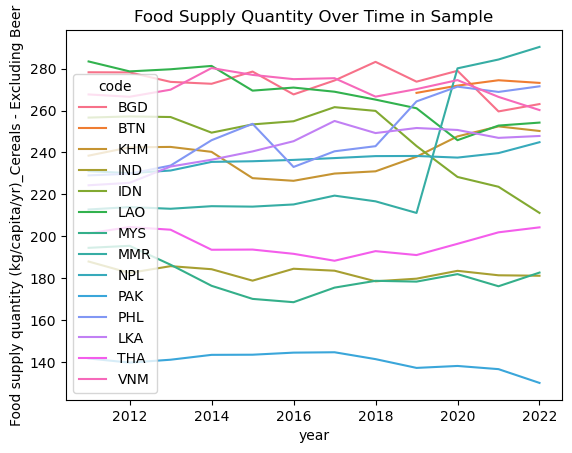

In [21]:
sns.lineplot(
    data = df_2merged,      # Dataframe with long format data
    x = 'year',                   # Column for x-axis (dates)
    y = 'Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer',         # Column for y-axis (GDP values)
    hue = 'code'               # Column for color differentiation (countries)
).set_title("Food Supply Quantity Over Time in Sample")

In [22]:
df_foodSupply_bycountry = df_2merged.groupby('code')['Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer'].describe()
df_foodSupply_bycountry.head(4)

,count,mean,std,min,25%,50%,75%,max
code,,,,,,,,
BGD,12.0,273.529167,6.960944,259.59,271.510,274.075,278.3550,283.25
BTN,4.0,272.002500,2.596438,268.44,271.035,272.550,273.5175,274.47
IDN,12.0,246.335833,16.449205,211.13,239.370,254.140,256.9800,261.62
IND,12.0,182.609167,2.849582,178.48,180.780,182.970,184.3050,187.92


In [23]:
df_plot = df_foodSupply_bycountry['mean'].head(14).sort_values()
df_plot

code
PAK    140.095833
MYS    180.360000
IND    182.609167
THA    196.858333
MMR    232.124167
NPL    236.355833
KHM    238.935000
LKA    242.246667
IDN    246.335833
PHL    248.746667
LAO    267.656667
VNM    270.848333
BTN    272.002500
BGD    273.529167
Name: mean, dtype: float64

Text(0.5, 1.0, 'Mean Food Supply Quantity by country over sample')

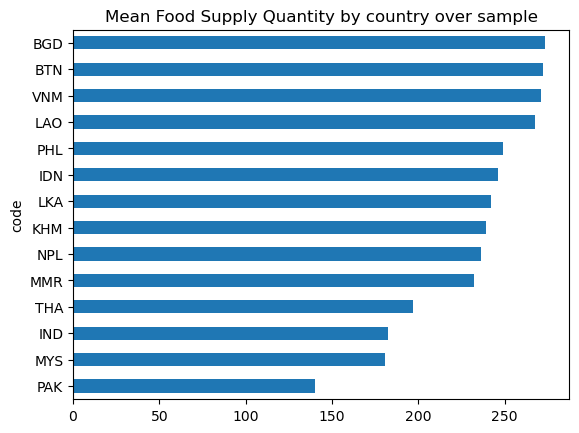

In [24]:
df_plot.plot(kind = 'barh')
plt.title("Mean Food Supply Quantity by country over sample")

<Axes: >

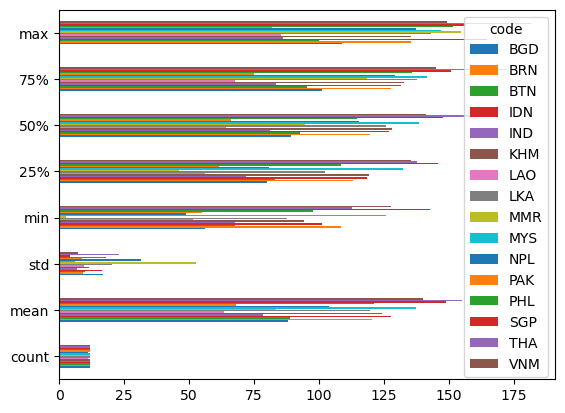

In [25]:
df_access_clean.groupby('code')['Mobile Cellular Subscriptions (per 100 people)'].describe().transpose().plot(kind = 'barh')


Text(0, 0.5, 'Statistic')

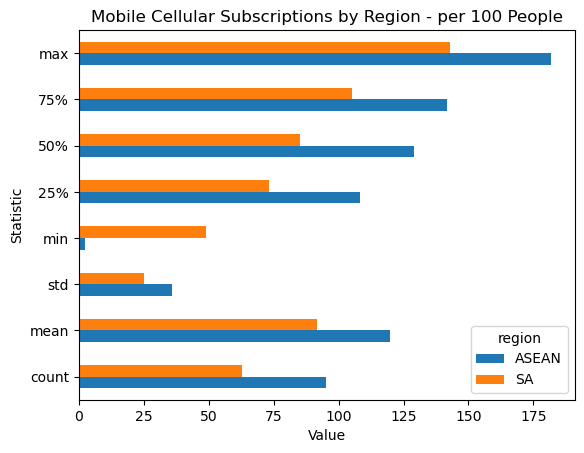

In [26]:
mob_comp_plot = df_2merged.groupby('region')['Mobile Cellular Subscriptions (per 100 people)'].describe().transpose().plot(kind = 'barh')
mob_comp_plot.set_title('Mobile Cellular Subscriptions by Region - per 100 People')
mob_comp_plot.set_xlabel('Value')
mob_comp_plot.set_ylabel('Statistic')

Text(0, 0.5, 'Statistic')

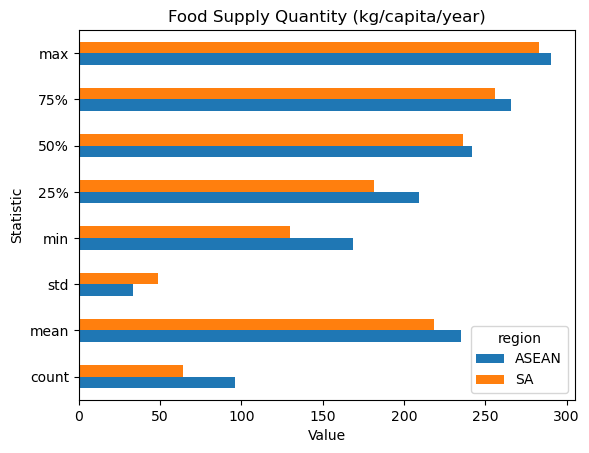

In [27]:
foodSupply_plot = df_2merged.groupby('region')['Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer'].describe().transpose().plot(kind = 'barh')
foodSupply_plot.set_title('Food Supply Quantity (kg/capita/year)')
foodSupply_plot.set_xlabel('Value')
foodSupply_plot.set_ylabel('Statistic')

Error: unable to calculate line of best fit


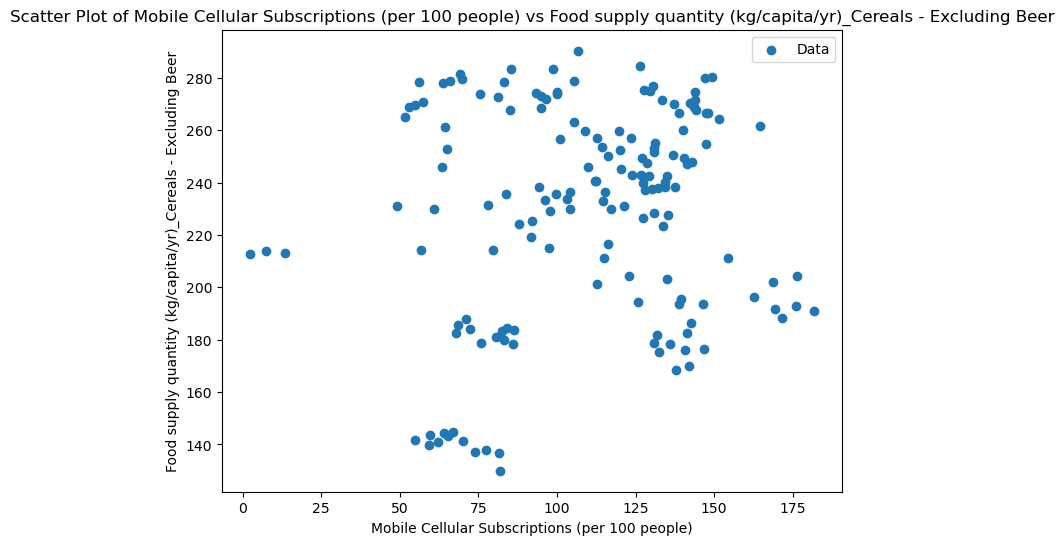

In [39]:
scatter_plot(df_2merged,'Mobile Cellular Subscriptions (per 100 people)','Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer')

Error: unable to calculate line of best fit


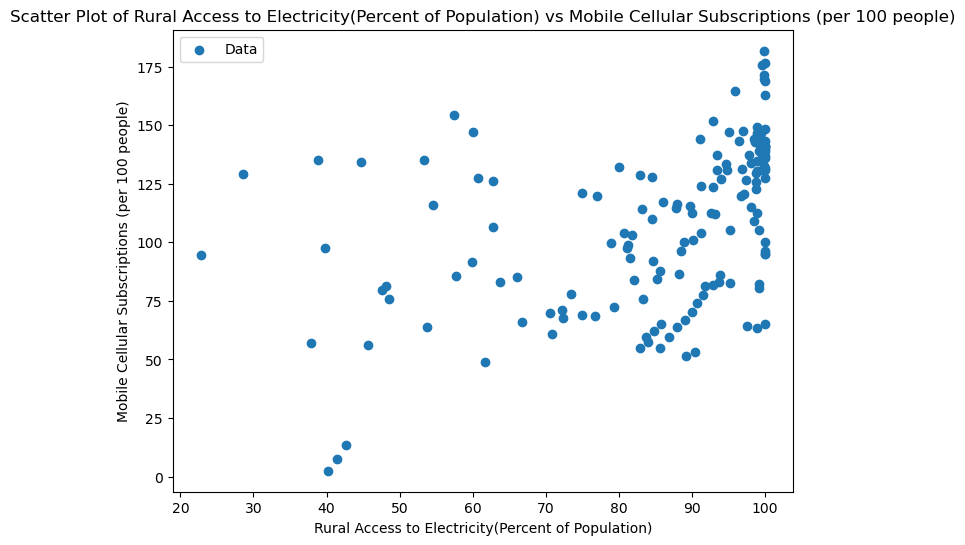

In [40]:
scatter_plot(df_2merged,'Rural Access to Electricity(Percent of Population)','Mobile Cellular Subscriptions (per 100 people)')

# Adding Regressions

In [30]:
ols(
    df=df_2merged,
    y_data='Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer',
    y_feat=None,
    x_data='Mobile Cellular Subscriptions (per 100 people)',
    x_feat=None
)

                                                 OLS Regression Results                                                 
Dep. Variable:     Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer   R-squared:                       0.020
Model:                                                                      OLS   Adj. R-squared:                  0.013
Method:                                                           Least Squares   F-statistic:                     3.135
Date:                                                          Sun, 25 May 2025   Prob (F-statistic):             0.0786
Time:                                                                  19:46:06   Log-Likelihood:                -809.61
No. Observations:                                                           158   AIC:                             1623.
Df Residuals:                                                               156   BIC:                             1629.
Df Model:                       